# Statsmodels

1. Introduction
2. ETS Decomposition
3. Moving Averages
4. Holt Winters Methods

### Trends

![Trends](Trends.png)

1. **Upward** : Moving up.
2. **Down** : Mowing Down.
3. **Stationary** : Moving Horizontal.
4. **Seasonality** : Repeating Trends.
5. **Cyclical** : Trends with no repetition sets.

The time series data can have any one of the trend or all of them.

**Line** plot is used for time series data, it helps to represnt the **trends**, **patterns** and **seasonality** in the data.

### Hodrick Prescott 

Filter seperates a time series into a **trend component** and a **cyclical component**

For minimizing the loss function, Lambda (smoothing parameter) is used.
- When analyzing **yearly** data (lambda : **6.25**) recommended.
- When analyzing **quarterly** data (lambda : **1600**) recommended.
- When analyzing **monthly** data (lambda : **129,600**) recommended.

In [1]:
import numpy as np
import pandas as pd

Importing **Dataset**

Dataset consist of Date, Year, Quarter and some financial informations.

In [2]:
df = pd.read_csv('Macro.csv', index_col=0, parse_dates=[0])
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Observing the Real GDP column.

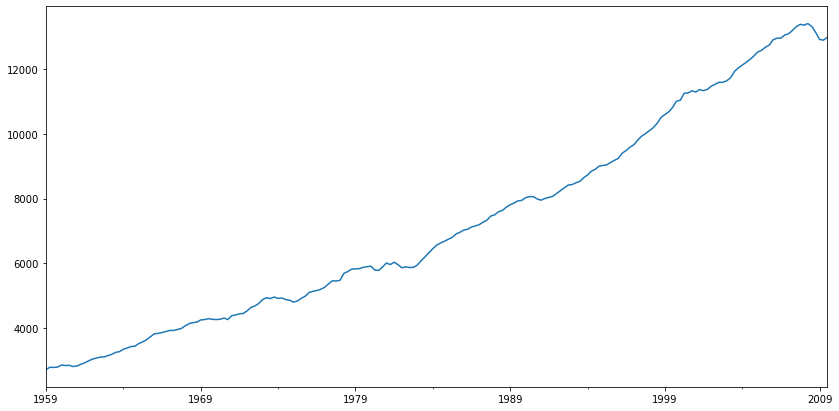

In [3]:
df['realgdp'].plot(figsize=(14,7));

**tsa** : Time Series Analysis

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

Tuple unpacking.

In [5]:
gdpCycle, gdpTrend = hpfilter(x=df['realgdp'], lamb=1600)

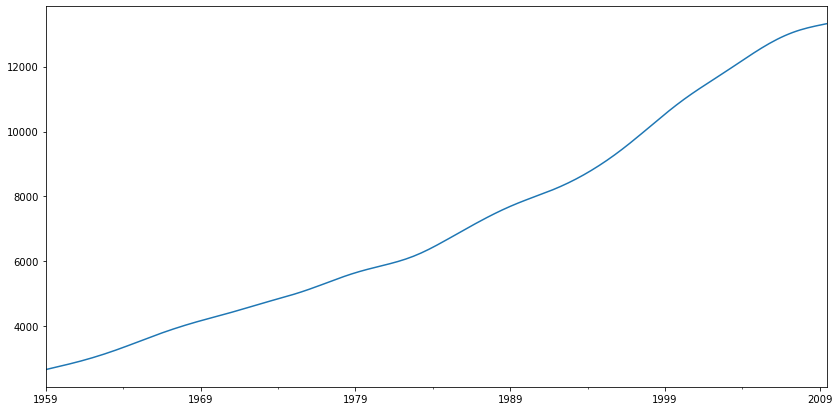

In [6]:
gdpTrend.plot(figsize=(14,7));

In [7]:
df['gdptrend'] = gdpTrend

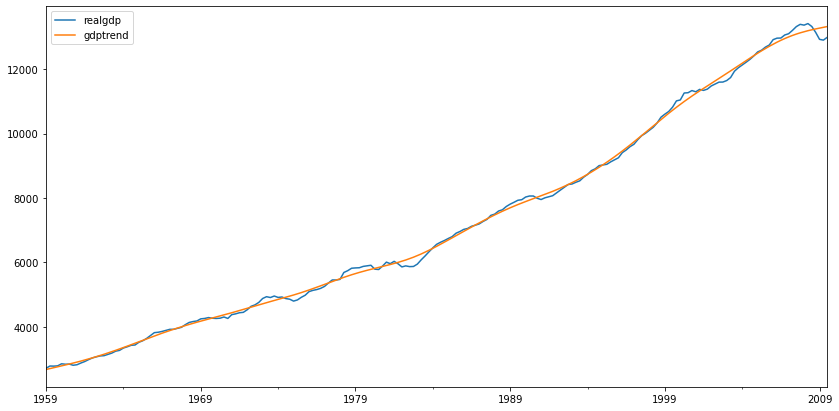

In [8]:
df[['realgdp', 'gdptrend']].plot(figsize=(14,7));

Closer look.

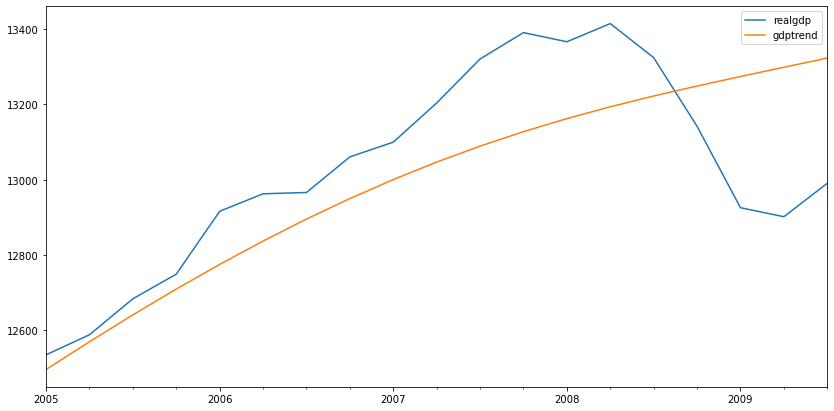

In [9]:
df[['realgdp', 'gdptrend']]['2005':].plot(figsize=(14,7));

### ETS Models (Error, Trend and Seasonality)

- Exponential Smoothing
- Trend Methods Models
- ETS Decomposition

Used to seperate out the different components.

Good way to build an understanding of **behaviour**.

**ETS Decomposition**

1. **Observed** : Original observed data.
2. **Trend** : Trend in the data.
3. **Seasonal** : Seasonality in the data.
4. **Residual** : **Errors** not explained by **Trends** and **Seasonality**.

### Additive Model

- We apply an **additive model** when it seems that the **trend** is more **linear**. 
- The **seasonality** and **trend** components seems to be **constant** overtime.
- e.g Every year we have same number of passengers.

### Multiplicative Model

- A **multiplicative model** is more appropriate when we are increasing or decreasing at **non linear** rate.
- e.g Every year we double the number of passengers.

In [10]:
airline = pd.read_csv('Airline Passengers.csv', index_col='Month', parse_dates=['Month'])
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


There should be no missing data before performing any **ETS**

In [11]:
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


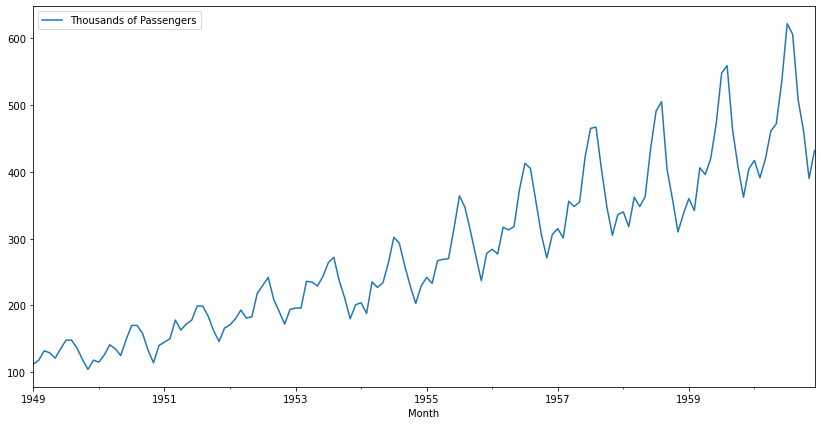

In [12]:
airline.plot(figsize=(14,7));

Here, you can find that the trend is not linear, it is **increasing**. So we have to use **Multiplicative** model.

if the trend is **linear**, then **additive** model is used.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

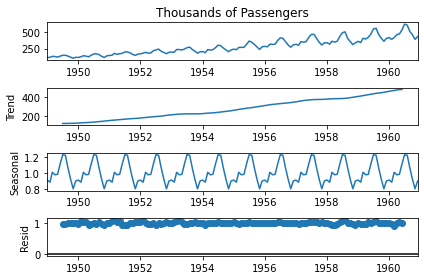

In [15]:
result.plot();

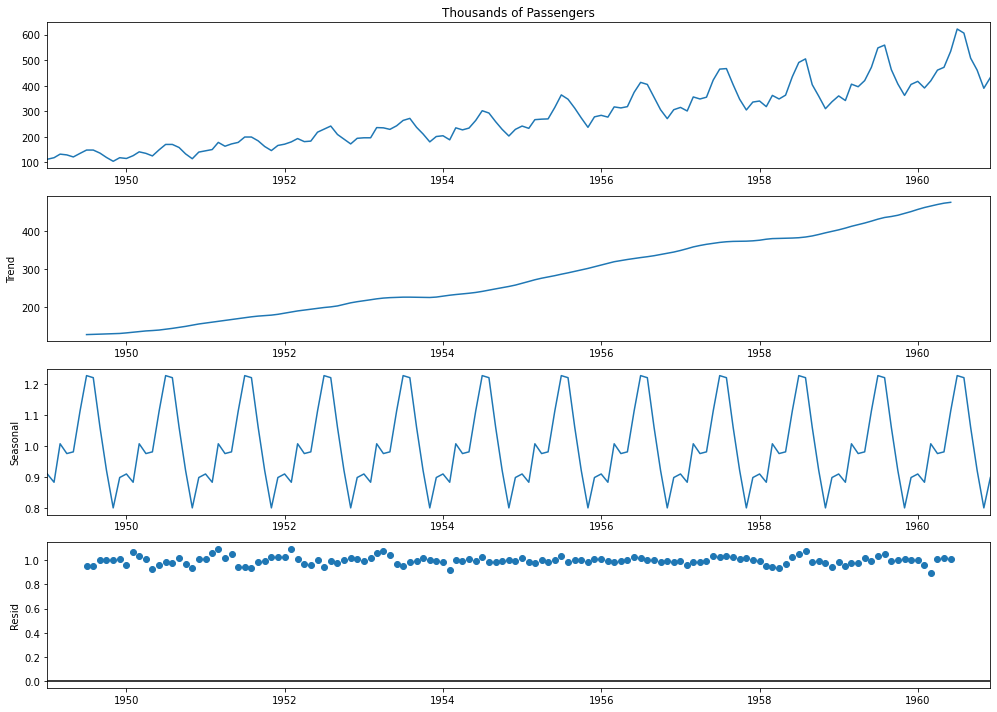

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] =  14,10
result.plot();

We can also plot seperately.

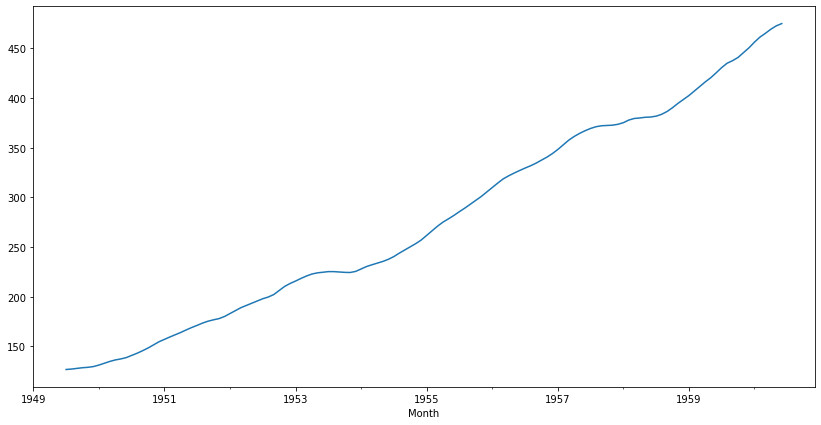

In [17]:
result.trend.plot(figsize=(14,7));

# EWMA Model : Exponentialy Weighted Moving Average

A simple moving averages can allow us to create a simple model that describes some **trend** level behavior of a time series.

**EWMA** is an expansion of **SMA**

### SMA : Simple Moving Averages.

- Entire model will be constrained to the same **window size**.
- e.g. Even if we have data of 10 years, still we can only choose same and single window size for entire data.
- Smaller windows will lead to more **noise**, rather than signal.
- It will never reach a full peak or valley of the data due to averaging.
- Does not really inform about possible **future behaviour**, all it really does is describe **trends** in data.
- Extreme historical values can **skew** SMA significantly.

By using **EWMA** we can add more **weights** to the recent data as compared to older data. 
- **EWMA** help to fix the issues of SMA.
- **EWMA** will allow us to reduce **lag** effect from SMA.
- **EWMA** put more weight on values that occured more recently.
- Weights applied will depend on the actual parameters (number of periods given in window size)

In [18]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


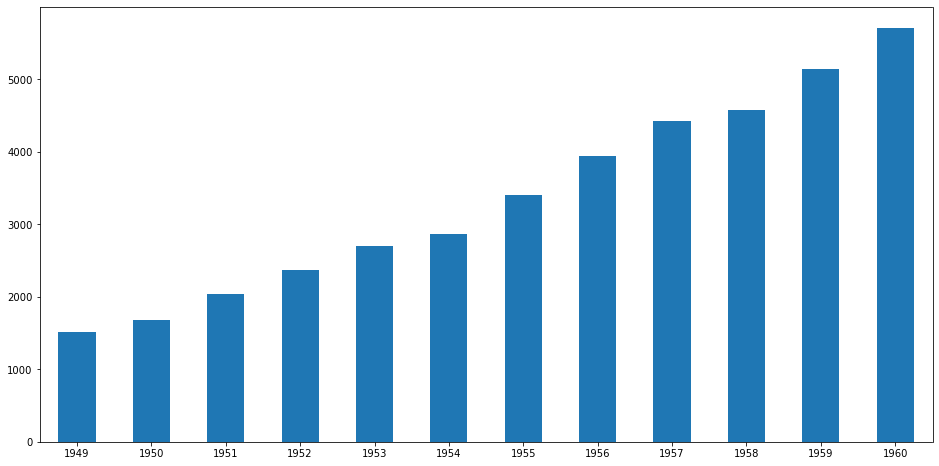

In [19]:
ax = airline['Thousands of Passengers'].resample('A').sum().plot(kind='bar', figsize=(16,8))
ax.set(xlabel='')
ax.set_xticklabels(labels=['1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960'], rotation=0);

In [20]:
airline['6 month SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [21]:
airline['12 month SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

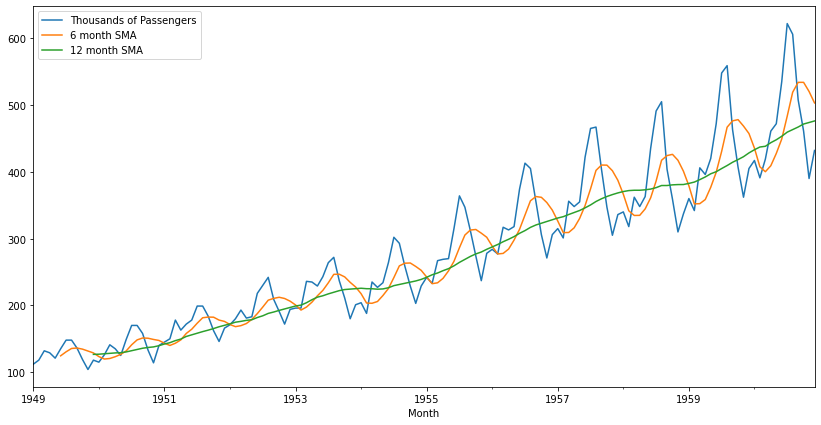

In [22]:
airline.plot(figsize=(14, 7));

In [23]:
airline['12 month EWMA'] = airline['Thousands of Passengers'].ewm(span=12).mean()

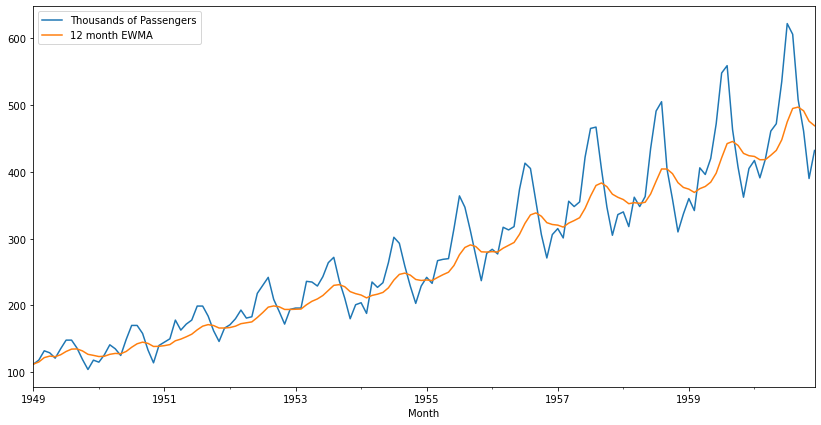

In [24]:
airline[['Thousands of Passengers', '12 month EWMA']].plot(figsize=(14,7));

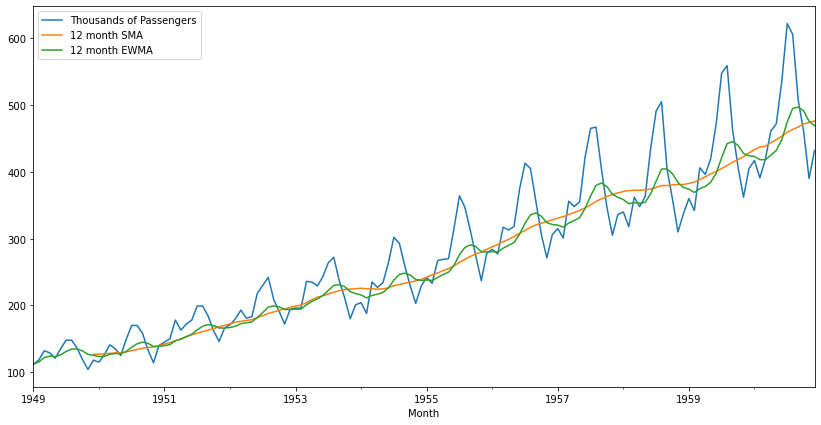

In [25]:
airline[['Thousands of Passengers', '12 month SMA','12 month EWMA']].plot(figsize=(14,7));

# Holt Winters

A **seasonal** method comprises of the **forecast equation** and three **smoothing equations**.

1. **Level** component.
2. **Trend** component.
3. **Seasonal** component.

Smoothing parameters : **alpha** (Address level), **beta** (Address trend) and **gamma** (Address seasonality).

The **additive** method is preferred when the **seasonal** variations are **constant** through the series.

The **multiplicative** method is preferred when the **seasonal** variations are changing proportional to the **level** of the series.

In [26]:
airline = pd.read_csv('Airline Passengers.csv', index_col='Month', parse_dates=['Month'])
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Data set consist frequency of month start, so set frequency to **MS** : Month Start.

In [28]:
airline.index.freq = 'MS'

In [42]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

In [30]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [31]:
airline.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [32]:
model = SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False)

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


**EWMA** and **SES** results are almost **similar**.

In [33]:
airline['SES12'] = model.fittedvalues.shift(-1)
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### DES : Double Exponential Smoothing

Assuming **linearity**, using **additive model** and applying **DES** : Double Exponential Smoothing.

In [35]:
airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline.head()

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.540770
1949-02-01,118,112.923077,112.923077,120.495273
1949-03-01,132,115.857988,115.857988,134.434351
1949-04-01,129,117.879836,117.879836,131.564469
1949-05-01,121,118.359861,118.359861,123.602997


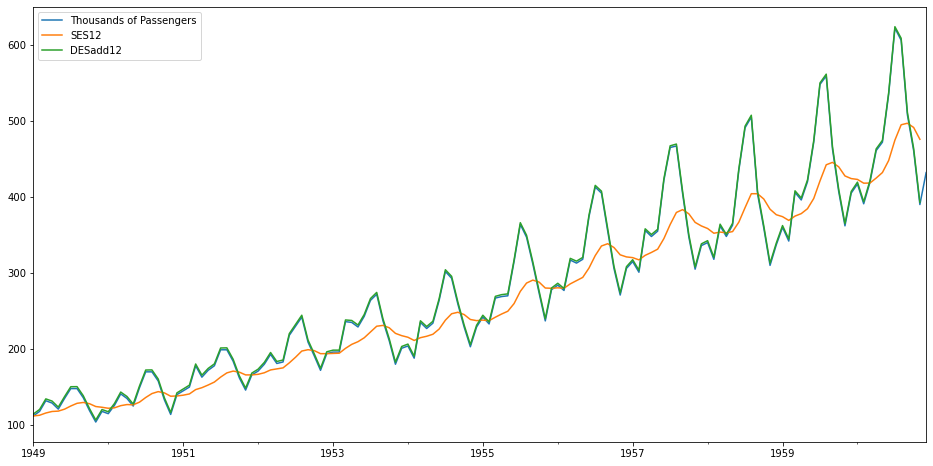

In [36]:
airline[['Thousands of Passengers','SES12','DESadd12']].plot(figsize=(16,8), xlabel='');

Passengers and SES12 are almost overlapping, having a closer look for only 2 years.

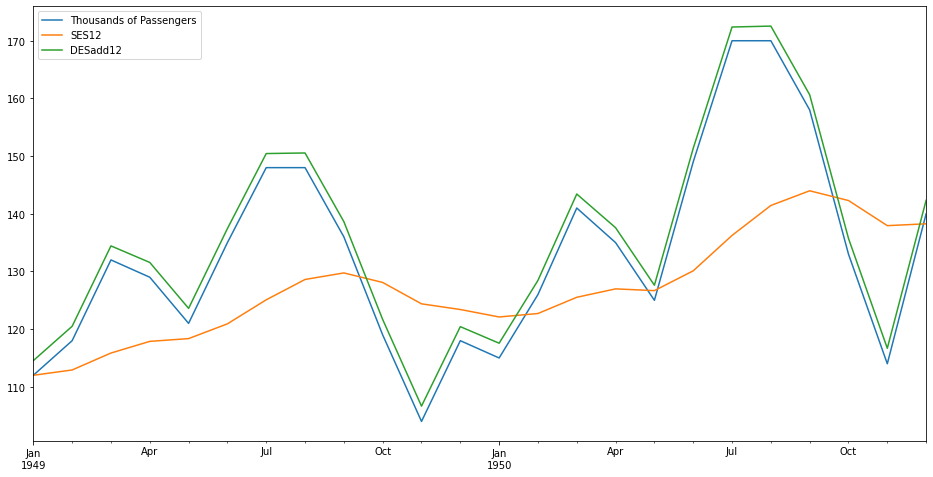

In [37]:
airline[['Thousands of Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(16,8), xlabel='');

Using **multiplicative model**.

In [38]:
airline['DESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
airline.head()

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.540770,109.374338
1949-02-01,118,112.923077,112.923077,120.495273,115.328802
1949-03-01,132,115.857988,115.857988,134.434351,129.393928
1949-04-01,129,117.879836,117.879836,131.564469,126.630889
1949-05-01,121,118.359861,118.359861,123.602997,118.706266


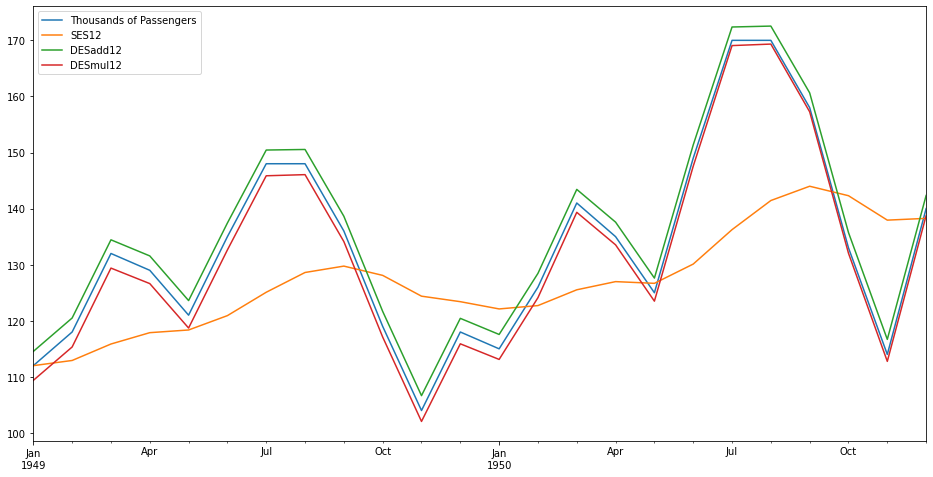

In [39]:
airline[['Thousands of Passengers','SES12','DESadd12','DESmul12']].iloc[:24].plot(figsize=(16,8), xlabel='');

### TES : Triple Exponential Smoothing.

Supports for both **trend** and **seasonality** in data.

**Shift** is not need in TES.

In [40]:
airline['TESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


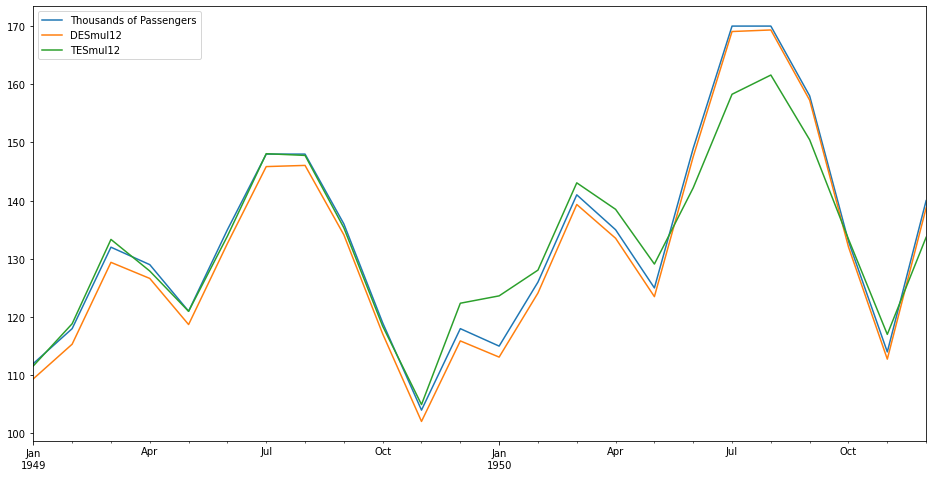

In [41]:
airline[['Thousands of Passengers','DESmul12','TESmul12']].iloc[:24].plot(figsize=(16,8), xlabel='');